In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
# загружаем данные
data = pd.read_csv('Data/FE.csv', sep=';')
# выводим наблюдения
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0


In [2]:
# создаем переменную paym, которая является отношением выданной 
# суммы кредита (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
data['paym'] = data['credit_sum'] / data['credit_month']

In [3]:
# заменяем бесконечные значения на 1
data['paym'].replace([np.inf, -np.inf], 1, inplace=True)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,paym
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1473.250000
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1735.333000
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1538.900000
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1830.100000
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,636.611111


In [4]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(data['job_position'].unique())

['SPC' 'UMN' 'PNA' 'WOI' 'WRK' 'BIS' 'ATP' 'DIR' 'NOR' 'OTHER' 'INP' 'WRP'
 'BIU' 'PNI']


In [5]:
# затем создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER': 20000}
# создаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
data['avrzarplata'] = data['job_position'].map(dct)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,paym,avrzarplata
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1473.250000,63000
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1735.333000,63000
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1538.900000,51000
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1830.100000,63000
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,636.611111,71000


In [6]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
data['retired'] = np.where(data['age']>=60, 'Yes', 'No')
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,paym,avrzarplata,retired
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1473.250000,63000,No
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1735.333000,63000,No
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1538.900000,51000,No
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1830.100000,63000,No
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,636.611111,71000,Yes


In [7]:
# создаем новую переменную age_inc, которая принимает значение "Yes",
# если речь идет о клиентах старше 35 лет И с суммой кредита свыше 10000, 
# и значение "No" в противном случае
data['age_inc'] = np.where((data['age'] > 35) & (data['credit_sum'] > 10000), 'Yes', 'No')
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,paym,avrzarplata,retired,age_inc
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1473.250000,63000,No,No
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1735.333000,63000,No,Yes
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1538.900000,51000,No,No
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1830.100000,63000,No,Yes
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,636.611111,71000,Yes,Yes


In [8]:
# создаем переменную, у которой каждое значение - 
# среднее значение monthly_income в категории 
# переменной living_region
means = data.groupby('living_region')['monthly_income'].mean()
data['region_mean_income'] = data['living_region'].map(means)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,paym,avrzarplata,retired,age_inc,region_mean_income
0,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1473.250000,63000,No,No,31722.560294
1,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1735.333000,63000,No,Yes,31708.270771
2,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1538.900000,51000,No,No,36600.517612
3,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1830.100000,63000,No,Yes,34083.284007
4,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,636.611111,71000,Yes,Yes,33618.413074


In [9]:
# загружаем данные
data = pd.read_csv('Data/FE2.csv', sep=';')
# выводим наблюдения
data[100:105]

,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL
100,1,0,0,1
101,0,0,0,0
102,0,0,0,0
103,1,0,0,1
104,0,0,0,0


In [10]:
# вычисляем балл как сумму единичных 
# значений бинарных переменных
data['score'] = (data == 1).sum(axis=1)
data[100:105]

,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,score
100,1,0,0,1,2
101,0,0,0,0,0
102,0,0,0,0,0
103,1,0,0,1,2
104,0,0,0,0,0


In [11]:
# импортируем функцию haversine() пакета haversine
from haversine import haversine
# загружаем и смотрим данные
data = pd.read_csv('Data/Flats.csv', encoding='cp1251', sep=';')
data.head()

,Rooms_Number,Object_Type,Settlement,District,Street,House_Number,Metro,Metro_m,Space_Total,Lat,Long,Date_Postr
0,1,Хрущевка,Новосибирск,Первомайский,Маяковского,24,Речной вокзал,11260,30.5,54.9738,83.0860,1971
1,1,Типовая,Новосибирск,Первомайский,Звездная,14,Речной вокзал,12130,28.9,54.9551,83.0681,1974
2,1,Типовая,Новосибирск,Центральный,Лермонтова,36,Сибирская,438,31.9,55.0446,82.9267,1973
3,2,Хрущевка,Новосибирск,Центральный,Достоевского,20,Сибирская,312,44.7,55.0456,82.9192,1964
4,2,Улучшенной планировки,Новосибирск,Советский,Демакова,12,Речной вокзал,23340,49.0,54.8634,83.1041,1989


In [12]:
# пишем функцию, вычисляющую расстояние по формуле гаверсинусов
def calculate_distance(lat1, long1, lat2, long2, km=False):
    rad = 6372795
    
    if km:
        rad = np.round(rad, -3) / 1000
    
    lat1 = lat1 * np.pi / 180.
    long1 = long1 * np.pi / 180.
    lat2 = lat2 * np.pi / 180.
    long2 = long2 * np.pi / 180.
    
    cl1 = np.cos(lat1)
    cl2 = np.cos(lat2)
    sl1 = np.sin(lat1)
    sl2 = np.sin(lat2)
    delta = long2 - long1
    cdelta = np.cos(delta)
    sdelta = np.sin(delta)
    
    y = np.power(np.power(cl2 * sdelta, 2) + np.power(cl1 * sl2 - sl1 * cl2 * cdelta, 2), 0.5)
    x = sl1 * sl2 + cl1 * cl2 * cdelta
    ad = np.arctan2(y,x)
    dist = ad * rad
    
    return dist

In [13]:
# задаем координаты «центра», сначала широту, затем долготу
city_center_coordinates = (55.0415000, 82.9346000)
# создаем переменную – расстояние квартиры от «центра»,
# вооспользовавшись функцией calculate_distance()
data['dist_center'] = calculate_distance(data['Lat'], 
                                         data['Long'],
                                         city_center_coordinates[0], 
                                         city_center_coordinates[1], 
                                         km=True)
# а еще можно воспользоваться готовой функцией haversine()
data['dist_center2'] = data.apply(
    lambda row: haversine((row['Lat'], row['Long']), city_center_coordinates), axis=1)
# смотрим результаты
data.head()

,Rooms_Number,Object_Type,Settlement,District,Street,House_Number,Metro,Metro_m,Space_Total,Lat,Long,Date_Postr,dist_center,dist_center2
0,1,Хрущевка,Новосибирск,Первомайский,Маяковского,24,Речной вокзал,11260,30.5,54.9738,83.0860,1971,12.246147,12.242320
1,1,Типовая,Новосибирск,Первомайский,Звездная,14,Речной вокзал,12130,28.9,54.9551,83.0681,1974,12.841525,12.837513
2,1,Типовая,Новосибирск,Центральный,Лермонтова,36,Сибирская,438,31.9,55.0446,82.9267,1973,0.610227,0.610037
3,2,Хрущевка,Новосибирск,Центральный,Достоевского,20,Сибирская,312,44.7,55.0456,82.9192,1964,1.082215,1.081877
4,2,Улучшенной планировки,Новосибирск,Советский,Демакова,12,Речной вокзал,23340,49.0,54.8634,83.1041,1989,22.575526,22.568473


In [14]:
# импортируем библиотеку pygeohash для геохеширования
import pygeohash as gh
# создаем переменную - геохеш
data['geohash'] = data.apply(lambda x: gh.encode(x['Lat'], x['Long'], precision=5), axis=1)
# выводим первые 5 наблюдений датафрейма
data.head()

,Rooms_Number,Object_Type,Settlement,District,Street,House_Number,Metro,Metro_m,Space_Total,Lat,Long,Date_Postr,dist_center,dist_center2,geohash
0,1,Хрущевка,Новосибирск,Первомайский,Маяковского,24,Речной вокзал,11260,30.5,54.9738,83.0860,1971,12.246147,12.242320,vcg0d
1,1,Типовая,Новосибирск,Первомайский,Звездная,14,Речной вокзал,12130,28.9,54.9551,83.0681,1974,12.841525,12.837513,vcg0d
2,1,Типовая,Новосибирск,Центральный,Лермонтова,36,Сибирская,438,31.9,55.0446,82.9267,1973,0.610227,0.610037,vcfcp
3,2,Хрущевка,Новосибирск,Центральный,Достоевского,20,Сибирская,312,44.7,55.0456,82.9192,1964,1.082215,1.081877,vcfcn
4,2,Улучшенной планировки,Новосибирск,Советский,Демакова,12,Речной вокзал,23340,49.0,54.8634,83.1041,1989,22.575526,22.568473,vcg05


In [15]:
# вычисляем геохеш "центра"
geohash_center = gh.encode(55.0415000, 82.9346000, precision=5)
geohash_center

'vcfcp'

In [16]:
# преобразовываем геохеш "центра" во множество
geohash_center_set = set(geohash_center)
# создаем переменную - количество совпадающих символов 
# (учитываем повторяющиеся символы)
data['match'] = data['geohash'].apply(
    lambda x: sum([let1 == let2 for let1, let2 in zip(geohash_center, x)]))
# создаем переменную - количество совпадающих символов 
# (не учитываем повторяющиеся символы)
data['match2'] = data['geohash'].apply(
    lambda x: len(set(x) & geohash_center_set))
data.head()

,Rooms_Number,Object_Type,Settlement,District,Street,House_Number,Metro,Metro_m,Space_Total,Lat,Long,Date_Postr,dist_center,dist_center2,geohash,match,match2
0,1,Хрущевка,Новосибирск,Первомайский,Маяковского,24,Речной вокзал,11260,30.5,54.9738,83.0860,1971,12.246147,12.242320,vcg0d,2,2
1,1,Типовая,Новосибирск,Первомайский,Звездная,14,Речной вокзал,12130,28.9,54.9551,83.0681,1974,12.841525,12.837513,vcg0d,2,2
2,1,Типовая,Новосибирск,Центральный,Лермонтова,36,Сибирская,438,31.9,55.0446,82.9267,1973,0.610227,0.610037,vcfcp,5,4
3,2,Хрущевка,Новосибирск,Центральный,Достоевского,20,Сибирская,312,44.7,55.0456,82.9192,1964,1.082215,1.081877,vcfcn,4,3
4,2,Улучшенной планировки,Новосибирск,Советский,Демакова,12,Речной вокзал,23340,49.0,54.8634,83.1041,1989,22.575526,22.568473,vcg05,2,2


In [17]:
# записываем датафрейм на основе CSV файла, содержащего даты
data = pd.read_csv('Data/MFOcredit.csv', encoding='cp1251', sep=';')
data.head()

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,4,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,5,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет


In [18]:
# переменным date_start и date_end присваиваем тип datetime, 
# чтобы работать с этими переменными как с датами
data['date_start'] = pd.to_datetime(data['date_start'])
data['date_end'] = pd.to_datetime(data['date_end'])

In [19]:
# вычисляем разницу в днях между датой погашения займа и 
# датой открытия займа, т.е. по сути вычисляем срок займа
data['diff'] = (data['date_end'] - data['date_start']).dt.days

In [20]:
# выделяем из переменной data_start ГОДА
data['year'] = pd.DatetimeIndex(data['date_start']).year
# а еще можно так data['year'] = data['date_start'].dt.year

# выделяем из переменной data_start КВАРТАЛЫ
data['quarter'] = pd.DatetimeIndex(data['date_start']).quarter
# а еще можно так data['quarter'] = data['date_start'].dt.quarter

# выделяем из переменной data_start МЕСЯЦЫ, где 1 - январь, 12 - декабрь
data['month'] = pd.DatetimeIndex(data['date_start']).month
# а еще можно так data['month'] = data['date_start'].dt.month

# выделяем из переменной data_start ПОРЯДКОВЫЕ НОМЕРА ДНЕЙ от 1 до 31
data['day'] = pd.DatetimeIndex(data['date_start']).day
# а еще можно так data['day'] = data['date_start'].dt.day

# выделяем из переменной data_start ДНИ НЕДЕЛИ от 0 до 6, где 0 - понедельник, 6 - воскресенье
data['dayofweek'] = pd.DatetimeIndex(data['date_start']).dayofweek
# а еще можно так data['dayofweek'] = data['date_start'].dt.dayofweek

# выделяем из переменной data_start НАЗВАНИЯ ДНЕЙ НЕДЕЛИ
data['weekday_name'] = pd.DatetimeIndex(data['date_start']).weekday_name
# а еще можно так data['weekday_name'] = data['date_start'].dt.weekday_name

In [21]:
# записываем датафрейм на основе CSV файла, 
# содержащего различные форматы даты
data = pd.read_csv('Data/DiffDates.csv', encoding='cp1251', sep=';')
data.head()

,даты в формате dd.mm.yyyy,даты в формате dd.mm.yy,даты в формате dd-Mth-yyyy,даты в формате dd-mm-yy,"даты в формате Month dd, yyyy",даты в формате dd.mm.yyyy hh:mm,даты в формате ddMMMyy:hh:mm:ss,даты в формате dd/mm/yyyy
0,01.10.2009,01.10.09,01-Oct-2009,01-10-09,"October 1, 2009",01.10.2009 9:30,18APR17:00:00:00,01/10/2009
1,09.12.2008,09.12.08,09-Dec-2008,09-12-08,"December 9, 2008",09.12.2008 10:02,10MAR17:00:00:00,09/12/2008
2,01.11.2012,01.11.12,01-Nov-2012,01-11-12,"November 01, 2012",01.11.2012 0:05,21FEB17:00:00:00,01/11/2012
3,15.12.2016,15.12.16,15-Dec-2016,15-12-16,"December 15, 2016",15.12.2016 16:07,26APR17:00:00:00,15/12/2016
4,11.03.2014,11.03.14,11-Mar-2014,11-03-14,"March 11, 2014",11.03.2014 15:08,08APR17:00:00:00,11/03/2014


In [22]:
# присваиваем переменным тип datetime, задав с помощью 
# параметра format паттерн парсинга даты
data['даты в формате dd.mm.yyyy'] = pd.to_datetime(data['даты в формате dd.mm.yyyy'], 
                                                   format='%d.%m.%Y')
data['даты в формате dd.mm.yy'] = pd.to_datetime(data['даты в формате dd.mm.yy'], 
                                                 format='%d.%m.%y')
data['даты в формате dd-Mth-yyyy'] = pd.to_datetime(data['даты в формате dd-Mth-yyyy'], 
                                                    format='%d-%b-%Y')
data['даты в формате dd-mm-yy'] = pd.to_datetime(data['даты в формате dd-mm-yy'], 
                                                 format='%d-%m-%y')
data['даты в формате Month dd, yyyy'] = pd.to_datetime(data['даты в формате Month dd, yyyy'], 
                                                       format='%B %d, %Y')
data['даты в формате dd.mm.yyyy hh:mm'] = pd.to_datetime(data['даты в формате dd.mm.yyyy hh:mm'], 
                                                         format='%d.%m.%Y %H:%M')
data['даты в формате ddMMMyy:hh:mm:ss'] = pd.to_datetime(data['даты в формате ddMMMyy:hh:mm:ss'], 
                                                         format='%d%b%y:%H:%M:%S')
data['даты в формате dd/mm/yyyy'] = pd.to_datetime(data['даты в формате dd/mm/yyyy'],
                                                   format='%d/%m/%Y')
data.head()

,даты в формате dd.mm.yyyy,даты в формате dd.mm.yy,даты в формате dd-Mth-yyyy,даты в формате dd-mm-yy,"даты в формате Month dd, yyyy",даты в формате dd.mm.yyyy hh:mm,даты в формате ddMMMyy:hh:mm:ss,даты в формате dd/mm/yyyy
0,2009-10-01,2009-10-01,2009-10-01,2009-10-01,2009-10-01,2009-10-01 09:30:00,2017-04-18,2009-10-01
1,2008-12-09,2008-12-09,2008-12-09,2008-12-09,2008-12-09,2008-12-09 10:02:00,2017-03-10,2008-12-09
2,2012-11-01,2012-11-01,2012-11-01,2012-11-01,2012-11-01,2012-11-01 00:05:00,2017-02-21,2012-11-01
3,2016-12-15,2016-12-15,2016-12-15,2016-12-15,2016-12-15,2016-12-15 16:07:00,2017-04-26,2016-12-15
4,2014-03-11,2014-03-11,2014-03-11,2014-03-11,2014-03-11,2014-03-11 15:08:00,2017-04-08,2014-03-11


In [23]:
# загружаем необходимые библиотеки
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# пишем функцию, которая нам сгенерирует 1000 наблюдений
# - количество секунд, прошедших после полуночи
def rand_times(n):
    np.random.seed(42)
    rand_seconds = np.random.randint(0, 24 * 60 * 60, n)
    return pd.DataFrame(data=dict(seconds=rand_seconds))
n_rows = 1000
df = rand_times(n_rows)
# сортируем значения для построения графика
df = df.sort_values('seconds').reset_index(drop=True)
df.head()

,seconds
0,55
1,77
2,117
3,206
4,235


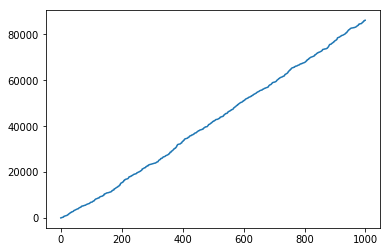

In [25]:
# строим график
df.seconds.plot()

In [26]:
# выполняем синусное и косинусное преобразование
# признака seconds и удаляем признак seconds
seconds_in_day = 24 * 60 * 60
df['sin_time'] = np.sin(2 * np.pi * df.seconds / seconds_in_day)
df['cos_time'] = np.cos(2 * np.pi * df.seconds / seconds_in_day)
df.drop('seconds', axis=1, inplace=True)
df.head()

,sin_time,cos_time
0,0.004000,0.999992
1,0.005600,0.999984
2,0.008508,0.999964
3,0.014980,0.999888
4,0.017089,0.999854


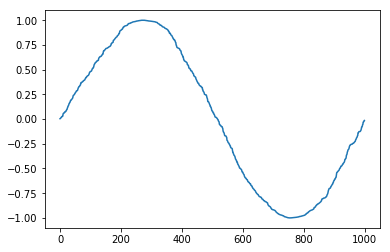

In [27]:
# выводим график для переменной, полученной
# в результате синусного преобразования
df.sin_time.plot()

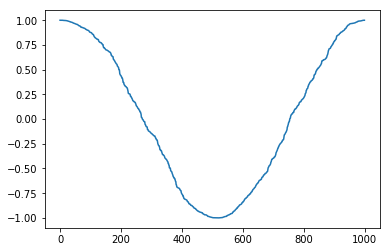

In [28]:
# выводим график для переменной, полученной
# в результате косинусного преобразования
df.cos_time.plot()

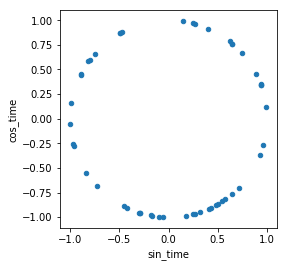

In [29]:
# выводим результаты нашего преобразования 
# в виде 24-часового цикла
df.sample(50).plot.scatter('sin_time', 'cos_time').set_aspect('equal')

In [30]:
# загружаем и смотрим данные
data = pd.read_csv('Data/rosbank.csv', sep=';')
data.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag
0,01.10.2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0
1,01.10.2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0
2,01.12.2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0
3,01.10.2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0
4,01.10.2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0


In [31]:
# переводим переменные TRDATETIME и PERIOD в тип datetime
data['TRDATETIME'] = pd.to_datetime(data['TRDATETIME'], format='%d%b%y:%X')
data['PERIOD'] = pd.to_datetime(data['PERIOD'], format='%d.%m.%Y')
# заполняем пропуски в channel_type нулями
data['channel_type'] = data['channel_type'].fillna('other')

In [32]:
# вычисляем сумму транзакций для каждого клиента
data['amount_sum_cl_id'] = data.groupby(
    'cl_id')['amount'].transform(lambda x: x.sum())
# вычисляем сумму транзакций по каждому периоду для каждого клиента
data['amount_sum_cl_id_period'] = data.groupby(
    ['cl_id', 'PERIOD'])['amount'].transform(lambda x: x.sum())
# вычисляем общее количество типов 
# транзакций для каждого клиента
data['total_num_trx_cat_cl_id'] = data.groupby(
    'cl_id')['trx_category'].transform(lambda x: x.count())
# вычисляем уникальное количество типов 
# транзакций для каждого клиента
data['uniq_num_trx_cat_cl_id'] = data.groupby(
    'cl_id')['trx_category'].transform(lambda x: x.nunique())
# вычисляем самый часто встречающийся тип транзакции
# для каждого клиента
data['trx_category_mode_cl_id'] = data.groupby(
    'cl_id')['trx_category'].transform(lambda x: x.value_counts().index[0])
# вычисляем разницу в днях между самой ранней и самой поздней
# датами транзакции для каждого клиента
data['diff_days_cl_id'] = data.groupby(
    'cl_id')['TRDATETIME'].transform(lambda x: x.max() - x.min()).dt.days
# вычисляем разницу в днях между конкретной и самой ранней
# датами транзакции для каждого клиента
data['days_from_first_transaction'] = data.groupby(
    'cl_id')['TRDATETIME'].transform(lambda x: x - x.min()).dt.days

In [33]:
# выводим первые 5 наблюдений
data.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,amount_sum_cl_id,amount_sum_cl_id_period,total_num_trx_cat_cl_id,uniq_num_trx_cat_cl_id,trx_category_mode_cl_id,diff_days_cl_id,days_from_first_transaction
0,2017-10-01,0,5200,other,810,2017-10-21 00:00:00,5023.0,POS,0,64383.0,63616.0,5,3,POS,53,8
1,2017-10-01,0,6011,other,810,2017-10-12 12:24:07,20000.0,DEPOSIT,0,64383.0,63616.0,5,3,POS,53,0
2,2017-12-01,0,5921,other,810,2017-12-05 00:00:00,767.0,POS,0,64383.0,767.0,5,3,POS,53,53
3,2017-10-01,0,5411,other,810,2017-10-21 00:00:00,2031.0,POS,0,64383.0,63616.0,5,3,POS,53,8
4,2017-10-01,0,6012,other,810,2017-10-24 13:14:24,36562.0,C2C_OUT,0,64383.0,63616.0,5,3,POS,53,12


In [34]:
# можно агрегировать c помощью 
# методов .groupby() и .agg()
aggregations = {
    'amount': 'mean',
    'trx_category': lambda x: x.value_counts().index[0],
    'target_flag': 'first'
}
agg_data = data.groupby('cl_id').agg(aggregations)

In [35]:
# смотрим агрегированный набор
agg_data

,amount,trx_category,target_flag
cl_id,,,
0,12876.600,POS,0
1,391.000,POS,0
5,3939.122,POS,1


In [36]:
# увеличиваем количество отображаемых столбцов
pd.set_option('display.max_columns', 50)

In [37]:
# пишем функцию агрегации
def build_features(data):
    aggregated = data.groupby('cl_id')[['channel_type']].first()
    ids = aggregated.index
    aggregated['cl_id'] = ids
    # вычисляем самую позднюю дату транзакции во всем наборе
    global_max_date = data['TRDATETIME'].max()
    # вычисляем самую позднюю дату транзакции по каждому периоду
    # для каждого клиента
    data['max_date'] = data.groupby(
        ['cl_id', 'PERIOD'])['TRDATETIME'].transform(lambda x: x.max())
    # вычисляем разницу между самой поздней датой транзакции во всем наборе
    # и самой поздней датой транзакции по каждому периоду для каждого клиента
    data['global_diff'] = (global_max_date - data['max_date']).dt.days
    # берем среднюю разницу между самой поздней датой транзакции во всем наборе
    # и самой поздней датой транзакции для каждого клиента
    aggregated['global_diff_mean'] = data.groupby('cl_id')['global_diff'].mean()
    # вычисляем сумму транзакций по каждому периоду для каждого клиента
    data['amount_sum_cl_id_period'] = data.groupby(
        ['cl_id', 'PERIOD'])['amount'].transform(lambda x: x.sum())
    # вычисляем для каждого клиента среднюю абсолютную разность 
    # на основе сумм транзакций по каждому периоду
    aggregated['mad_of_amount_sum_cl_id_period'] = data.groupby(
        'cl_id')['amount_sum_cl_id_period'].apply(lambda x: x.mad())
    # вычисляем общее количество транзакций для каждого клиента
    aggregated['total_number_transact_cl_id'] = data.groupby(
        'cl_id')['TRDATETIME'].apply(lambda x: x.count())
    # вычисляем уникальное количество MCC-кодов для каждого клиента
    aggregated['uniq_number_MCC_cl_id'] = data.groupby(
        'cl_id')['MCC'].apply(lambda x: x.nunique())
    # вычисляем уникальное количество MCC-кодов по каждому периоду 
    # для каждого клиента
    data['uniq_number_MCC_cl_id_period'] = data.groupby(
        ['cl_id', 'PERIOD'])['MCC'].transform(lambda x: x.nunique())
    # вычисляем для каждого клиента уникальное количество 
    # MCC-кодов, усредненное по периодам
    aggregated['uniq_number_MCC_cl_id_period'] = data.groupby(
        'cl_id')['uniq_number_MCC_cl_id_period'].apply(lambda x: x.mean())
    # вычисляем самый часто встречающийся тип транзакции
    # для каждого клиента
    aggregated['trx_category_cl_id_mode'] = data.groupby(
        'cl_id')['trx_category'].apply(lambda x: x.value_counts().index[0])
    # вычисляем разницу в днях между самой ранней и самой поздней
    # датами транзакции для каждого клиента
    aggregated['diff_days_cl_id'] = data.groupby(
        'cl_id')['TRDATETIME'].apply(lambda x: x.max() - x.min()).dt.days
    # вычисляем разницу в днях между самой ранней и самой поздней
    # датами POS-транзакции для каждого клиента
    aggregated['diff_days_POS'] = data[data['trx_category'] == 'POS'].groupby(
        'cl_id')['TRDATETIME'].apply(lambda x: x.max() - x.min()).dt.days
    # вычисляем разницу в днях между самой ранней и самой поздней
    # датами транзакции по каждому периоду для каждого клиента
    data['diff_days_cl_id_period'] = data.groupby(
        ['cl_id', 'PERIOD'])['TRDATETIME'].transform(
        lambda x: x.max() - x.min()).dt.days
    # вычисляем для каждого клиента разницу в днях между самой ранней 
    # и самой поздней датами транзакции, усредненную по периодам
    aggregated['mean_of_diff_days_cl_id_period'] = data.groupby(
        'cl_id')['diff_days_cl_id_period'].apply(lambda x: x.mean())
    # вычисляем разницу в днях между конкретной и самой ранней
    # датами транзакции для каждого клиента
    data['days_from_first_transaction'] = data.groupby(
        'cl_id')['TRDATETIME'].transform(lambda x: x - x.min()).dt.days
    # вычисляем среднюю разницу в днях между конкретной и самой ранней
    # датами транзакции для каждого клиента
    aggregated['mean_of_days_from_first_transaction'] = data.groupby(
        'cl_id')['days_from_first_transaction'].apply(lambda x: x.mean())
    # вычисляем среднюю абсолютную разность для вышесозданной переменной 
    # по каждому клиенту
    aggregated['mad_of_days_from_first_transaction'] = data.groupby(
        'cl_id')['days_from_first_transaction'].apply(lambda x: x.mad())
    # создаем тип транзакции, пополняет она или, наоборот, сокращает счет
    data['trx_type'] = data.apply(
        lambda x: 1 if x['trx_category'] in ['DEPOSIT', 'C2C_IN', 'BACK_TRX'] else -1, axis=1)
    # вычисляем сумму каждой транзакции с учетом знака 
    # (пополнения или снятия) по каждому клиенту
    data['amount_signed'] = data['amount'] * data['trx_type']
    # вычисляем среднюю сумму каждой транзакции с учетом знака 
    # (пополнения или снятия) по каждому клиенту
    aggregated['amount_signed'] = data.groupby(
        'cl_id')['amount_signed'].apply(lambda x: x.mean()) 
    # вычисляем сумму всех транзакций по каждому клиенту
    aggregated['amount_sum'] = data.groupby(
        'cl_id')['amount'].apply(lambda x: x.sum())
    # вычисляем минимальную сумму транзакции по каждому клиенту
    aggregated['amount_min'] = data.groupby(
        'cl_id')['amount'].apply(lambda x : x.min())
    # вычисляем сумму всех транзакций с учетом знака 
    # (пополнения или снятия) по каждому клиенту
    aggregated['amount_signed_sum'] = data.groupby(
        'cl_id')['amount_signed'].apply(lambda x: x.sum())
    # вычисляем сумму транзакций снятия по каждому клиенту
    aggregated['amount_snyatie'] = (aggregated['amount_sum'] - aggregated['amount_signed_sum']) / 2
    # вычисляем сумму транзакций пополнения по каждому клиенту
    aggregated['amount_popolnenie'] = aggregated['amount_sum'] - aggregated['amount_snyatie'] 
    # вычисляем уникальное количество периодов по каждому клиенту
    aggregated['PERIOD_uniq_count'] = data.groupby('cl_id')['PERIOD'].nunique()
    # вычисляем общее количество транзакций DEPOSIT по каждому клиенту
    aggregated['count_DEPOSIT'] = data[data['trx_category'] == 'DEPOSIT'].groupby(
        'cl_id')['trx_category'].count()
    # вычисляем общее количество транзакций POS по каждому клиенту
    aggregated['count_POS'] = data[data['trx_category'] == 'POS'].groupby(
        'cl_id')['trx_category'].count()
    # вычисляем сумму транзакций за первые 60 дней по каждому клиенту
    sum_amount_first_60_days = data.sort_values('TRDATETIME').groupby('cl_id').apply(
        lambda x: x['amount'][((x['TRDATETIME'] - x['TRDATETIME'].values[0]) / np.timedelta64(1, 'D') <= 60)].sum())
    # вычисляем сумму транзакций за первые 180 дней по каждому клиенту
    sum_amount_first_180_days = data.sort_values('TRDATETIME').groupby('cl_id').apply(
        lambda x: x['amount'][((x['TRDATETIME'] - x['TRDATETIME'].values[0]) / np.timedelta64(1, 'D') <= 180)].sum())
    # вычисляем отношение суммы транзакций за первые 60 дней к 
    # сумме транзакций за первые 180 дней по каждому клиенту
    aggregated['ratio_first_60_180_days'] = sum_amount_first_60_days / sum_amount_first_180_days
    # вычисляем сумму транзакций за последние 30 дней по каждому клиенту
    sum_amount_last_30_days = data.sort_values('TRDATETIME').groupby('cl_id').apply(
        lambda x: x['amount'][((x['TRDATETIME'].values[-1] - x['TRDATETIME']) / np.timedelta64(1, 'D') <= 30)].sum())
    # вычисляем сумму транзакций за последние 60 дней по каждому клиенту
    sum_amount_last_60_days = data.sort_values('TRDATETIME').groupby('cl_id').apply(
        lambda x: x['amount'][((x['TRDATETIME'].values[-1] - x['TRDATETIME']) / np.timedelta64(1, 'D') <= 60)].sum())
    # вычисляем отношение суммы транзакций за последние 30 дней к 
    # сумме транзакций за последние 60 дней по каждому клиенту
    aggregated['ratio_last_30_60_days'] = sum_amount_last_30_days / sum_amount_last_60_days
    # вычисляем сумму транзакций POS по каждому клиенту 
    aggregated['amount_sum_POS'] = data[data['trx_category'] == 'POS'].groupby(
        'cl_id')['amount'].sum()
    # вычисляем последний тип транзакции по каждому клиенту
    aggregated['last_trx_cat_cl_id'] = data.sort_values(
        'TRDATETIME').groupby('cl_id')['trx_category'].last()    
    # вычисляем общее количество транзакций DEPOSIT 
    # по каждому периоду для каждого клиента
    data['count_DEPOSIT_cl_id_period'] = data[data['trx_category'] == 'DEPOSIT'].groupby(
        ['cl_id', 'PERIOD'])['trx_category'].transform(lambda x: x.count())    
    # вычисляем среднюю абсолютную разность для вышесозданной 
    # переменной по каждому клиенту
    aggregated['mad_of_count_POS_cl_id_period'] = data.groupby(
        'cl_id')['count_DEPOSIT_cl_id_period'].apply(lambda x: x.mad())    
    # вычисляем разность между суммами транзакций в самую раннюю 
    # и самую позднюю даты для каждого клиента 
    aggregated['amount_diff_min_max_date'] = data.sort_values('TRDATETIME').groupby('cl_id').apply(
        lambda x: x['amount'][x['TRDATETIME'] == x['TRDATETIME'].values[0]].sum() - x['amount'][x['TRDATETIME'] == x['TRDATETIME'].values[-1]].sum())
    # добавляем зависимую переменную
    aggregated['target_flag'] = data.groupby('cl_id')['target_flag'].first()
    # удаляем индекс cl_id
    aggregated.reset_index('cl_id', drop=True, inplace=True)
    # импутируем пропуски нулями
    return aggregated.fillna(0)

# выполняем агрегирование
agg_data2 = build_features(data)

In [38]:
# смотрим агрегированный набор
agg_data2

,channel_type,cl_id,global_diff_mean,mad_of_amount_sum_cl_id_period,total_number_transact_cl_id,uniq_number_MCC_cl_id,uniq_number_MCC_cl_id_period,trx_category_cl_id_mode,diff_days_cl_id,diff_days_POS,mean_of_diff_days_cl_id_period,mean_of_days_from_first_transaction,mad_of_days_from_first_transaction,amount_signed,amount_sum,amount_min,amount_signed_sum,amount_snyatie,amount_popolnenie,PERIOD_uniq_count,count_DEPOSIT,count_POS,ratio_first_60_180_days,ratio_last_30_60_days,amount_sum_POS,last_trx_cat_cl_id,mad_of_count_POS_cl_id_period,amount_diff_min_max_date,target_flag
0,other,0,32.8,20111.6800,5,5,3.4,POS,53,45,9.6,16.2,14.72,-4876.600,64383.00,767.00,-24383.00,44383.00,20000.0,2,1.0,3,1.000000,0.011913,7821.00,POS,0.0,19233.0,0
1,other,1,66.4,242.8800,5,2,1.0,POS,82,82,4.8,63.4,25.36,-391.000,1955.00,199.00,-1955.00,1955.00,0.0,2,0.0,5,0.305882,1.000000,1955.00,POS,0.0,19.0,0
2,other,5,191.6,6778.7472,5,5,2.6,POS,73,73,10.0,46.6,29.68,-3939.122,19695.61,1387.61,-19695.61,19695.61,0.0,2,0.0,4,0.141484,0.924160,9695.61,POS,0.0,-2320.0,1
